# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













# **Desarrollo**

1)

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [83]:
def sign(num):
    return True if num > 0 else False

# function to crate a list of initial guesses for the other functions to use.
def ZerosGuesses(f, inferior_range = -10, superior_range = 10, accuracy = 0.1):
    range_ab = np.arange(inferior_range, superior_range, accuracy)
    ZeroGuess = []
    x_im1 = range_ab[0]
    for x_i in range_ab:
        if sign(f(x_i)) != sign(f(x_im1)):
            ZeroGuess.append(x_im1)
        x_im1 = x_i
    return ZeroGuess


def x(t, theta, v_0, b, g = 9.8):
    v_0x = v_0*np.cos(theta)
    return (v_0x/b)*(1-1/np.exp(b*t))

def y(t, theta, v_0, b, g = 9.8):
    v_0y = v_0*np.sin(theta)
    return (1/b)*(g/b+v_0y)*(1-1/np.exp(b*t))-((g/b)*t)

def R(theta, v_0, b, g = 9.8):
    v_0x = v_0*np.cos(theta)
    v_0y = v_0*np.sin(theta)

    y_interms_of_R =lambda R: (g/b+v_0y)*(R/v_0x) + (g/b**2)*np.log(1-(R*b)/(v_0x))
    initial_guesses = np.array(ZerosGuesses(y_interms_of_R, inferior_range = 0 ,superior_range = 400))
    initial_guess = initial_guesses[initial_guesses > 0]

    return  sc.optimize.bisect(y_interms_of_R,initial_guess, initial_guess + 0.1)


def t(R, theta, v_0, b, g = 9.8):
    f = lambda t : x(t, theta, v_0, b, g) - R
    return sc.optimize.newton(f,0)

2)

In [98]:
theta = np.pi/4
v_0 = 55
b = 0.005
max_dist = R(theta, v_0, b)
print(f"el alcance máximo es {max_dist} m.")

el alcance máximo es 300.6920766931974 m.


3)

In [80]:
filight_time = t(r, theta, v_0, b)

print(f"el tiempo de vuelo es {filight_time} s.")

el tiempo de vuelo es 7.8851018331643985 s.


4)

$x$ vs $t$

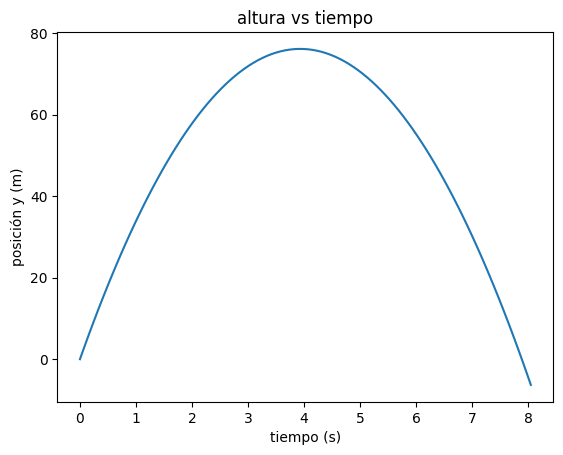

In [114]:
theta = np.pi/4
v_0 = 55
b = 0.005

T = np.linspace(0,filight_time,100)

X = x(T, theta, v_0, b)
Y = y(T, theta, v_0, b)

plt.title("altura vs tiempo")
plt.xlabel("tiempo (s)")
plt.ylabel("posición y (m)")

plt.plot(T, Y)

$y$ vs $t$

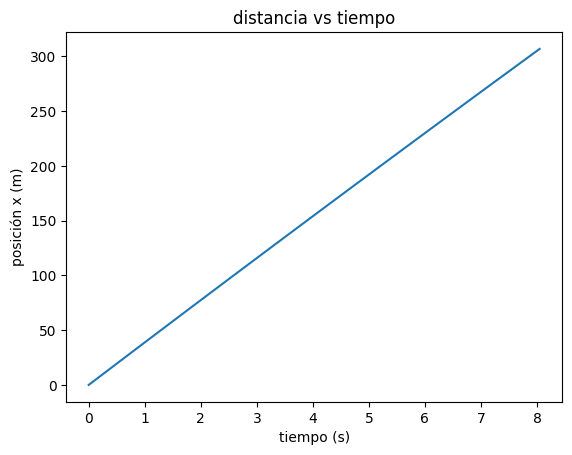

In [115]:
theta = np.pi/4
v_0 = 55
b = 0.005

T = np.linspace(0,filight_time,100)

X = x(T, theta, v_0, b)
Y = y(T, theta, v_0, b)

plt.title("distancia vs tiempo")
plt.xlabel("tiempo (s)")
plt.ylabel("posición x (m)")

plt.plot(T, X)

$x$ vs $y$

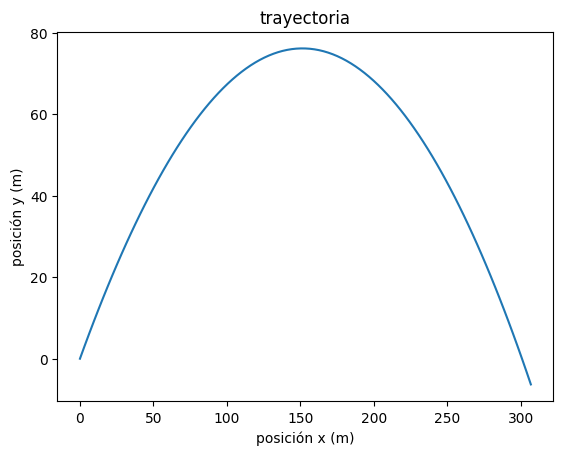

In [116]:
theta = np.pi/4
v_0 = 55
b = 0.005

T = np.linspace(0,filight_time,100)

X = x(T, theta, v_0, b)
Y = y(T, theta, v_0, b)

plt.title("trayectoria")
plt.xlabel("posición x (m)")
plt.ylabel("posición y (m)")

plt.plot(X, Y)

5)

In [121]:
b = 0.009
v_0 = 40

angles = np.arange(1, 89, 5)
angles = np.deg2rad(angles)

max_distances = np.array([R(theta, v_0, b) for theta in angles])

<ipython-input-83-622ed5430f61>:28: RuntimeWarning: invalid value encountered in log
  y_interms_of_R =lambda R: (g/b+v_0y)*(R/v_0x) + (g/b**2)*np.log(1-(R*b)/(v_0x))


6)

Text(0.5, 1.0, 'distancia vs tiempo')

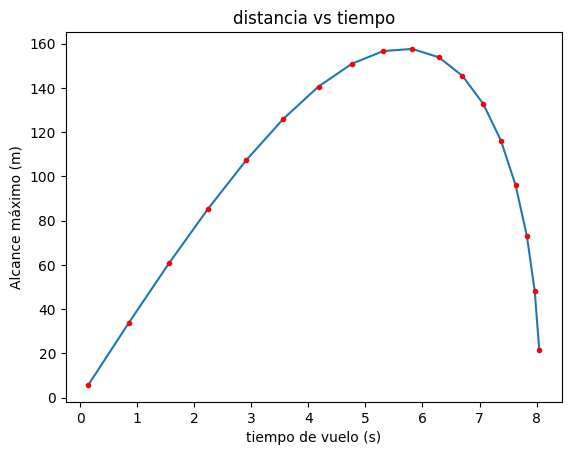

In [122]:
Times = np.array([t(R, theta, v_0, b, g = 9.8) for R, theta in zip(max_distances, angles)])
plt.plot(Times, max_distances)
plt.plot(Times, max_distances, "r.")

plt.title("Alcance máximo vs tiempo de vuelo")
plt.xlabel("tiempo de vuelo (s)")
plt.ylabel("Alcance máximo (m)")

plt.title("distancia vs tiempo")

7)

<ipython-input-83-622ed5430f61>:28: RuntimeWarning: invalid value encountered in log
  y_interms_of_R =lambda R: (g/b+v_0y)*(R/v_0x) + (g/b**2)*np.log(1-(R*b)/(v_0x))


Text(0, 0.5, 'posición y (m)')

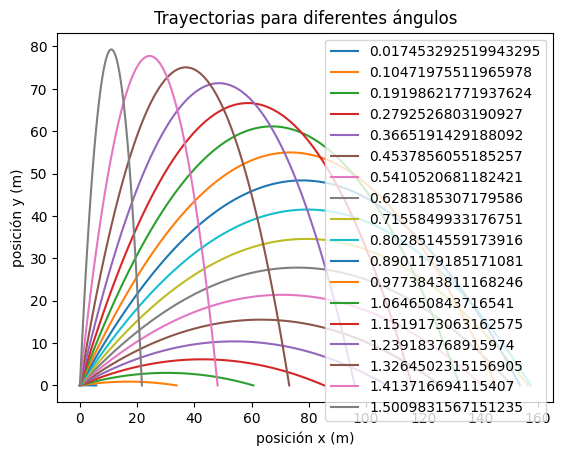

In [127]:
for theta in angles:

    max_dist = R(theta, v_0, b)
    filight_time = t(max_dist, theta, v_0, b)
    T = np.linspace(0,filight_time,100)

    X = x(T, theta, v_0, b)
    Y = y(T, theta, v_0, b)


plt.title("Trayectorias para diferentes ángulos")
plt.xlabel("posición x (m)")
plt.ylabel("posición y (m)")
